In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

import os
for dirname, _, filenames in os.walk('D:/oasis/car price analysis/carprice.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

In [15]:
cars_data = pd.read_csv('D:/oasis/car price analysis/carprice.csv')

In [16]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


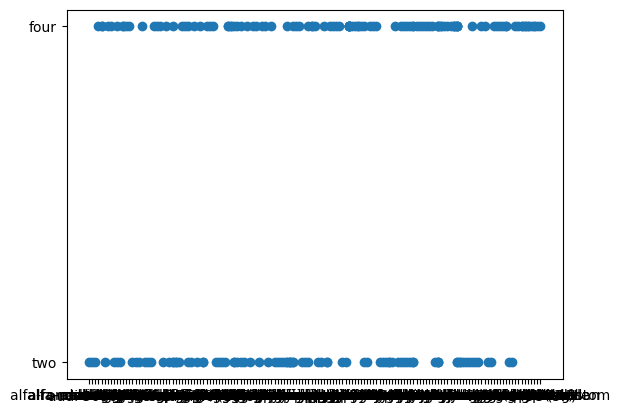

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
plt.scatter(cars_data['CarName'].tolist(),cars_data['doornumber'].tolist())
plt.show()
cars_data.info()

In [18]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

In [20]:
print('Number of duplicates are : ', cars_data.duplicated().sum())
cars_data = cars_data.drop_duplicates()

Number of duplicates are :  0


In [21]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [22]:
cars_data.drop('market', axis = 1, inplace = True)

KeyError: "['market'] not found in axis"

In [ ]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


In [ ]:
cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(0)

cars_data['cylinders'] = cars_data['cylinders'].fillna(0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

In [ ]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

In [ ]:
for col in cat_col:
    print(col)
    print(cars_data[col].unique())
    print(cars_data[col].nunique())
    print('\n', "======================================", '\n')

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48


model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti

In [ ]:
cars_data.drop(cars_data[cars_data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

In [ ]:
for i in num_col:
    fig = px.box(cars_data, x = cars_data[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()

**Insights**
* ***Engine Hp***:: Any Hp above than 500 is an outlier.
* ***Engine Cylinders***: Cylinders above than 8 and lower than 3 are outliers.
* ***Highway mpg***: Any highway mpg below than 12 and higher than 42 is as an outlier.
* ***City mpg***: Any city mpg below than 7 and higher than 31 is as an outlier.
* ***Price***: Car prices lower than 2000 and upper than 70.9K is an outlier.

> Deleting the outliers below by dropping them from the original dataset

In [ ]:
s1 = cars_data.shape
clean = cars_data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1403


> Checking the changes after outliers deletion from a dataset column by plotting the boxplot again

In [ ]:
fig = px.box(cars_data, x = cars_data['hp'])
fig.update_traces(fillcolor = '#C9A26B')

In [ ]:
cars_data.describe()

,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity,price
count,9784.00000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,2010.31204,231.154334,5.424162,3.505110,26.304374,19.180192,1560.331664,29204.537612
std,7.46610,78.693348,1.395065,0.841754,5.745849,4.376362,1464.248520,15605.472026
min,1990.00000,0.000000,3.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.00000,170.000000,4.000000,3.000000,22.000000,16.000000,549.000000,20498.000000
50%,2014.00000,220.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29089.000000
75%,2016.00000,288.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,38850.000000
max,2017.00000,485.000000,8.000000,4.000000,42.000000,31.000000,5657.000000,70900.000000


**Insights**
* ***Engine Hp***:: The minimum hp in dataset after outlier deletion is 0, average hp is 231 and maximum hp is 485.
* ***Engine Cylinders***: The minimum cylinders in dataset after outlier deletion are 3, average cylinders are 5 and maximum cylindes are 8.
* ***Highway mpg***: The minimum highway mpg in dataset after outlier deletion is 12, average highway mpg is 26.3 and maximum highway mpg is 42.
* ***City mpg***: The minimum city mpg in dataset after outlier deletion is 10, average city mpg is 19.1 and maximum city mpg is 31.
* ***Price***: The minimum car price in dataset after outlier deletion is 2000, average car price is around 29K and maximum car price is 70.9K.

# Univariate Analysis

In [ ]:
for i in cars_data:
    fig = px.histogram(cars_data, x= i, color_discrete_sequence = ['#C9A26B'])
    fig.show()

**Insights**
* ***Make***:: Least count: **Maserati** (2), Maximum count: **Chevrolet** (1039).
* ***Model***: Least count: **Many models** (1), Maximum count: **Silverado 1500** (156).
* ***Year***: Least count **1990** (76): , Maximum count: **2016** (1756).
* ***Fuel type***: Least count: **Natural Gas** (2), Maximum count: **Regular Unleaded** (6380).
* ***Hp***:: Least count: **Many hps** (1), Maximum count: **200** (355).
* ***Cylinders***: Least count: **3** (11), Maximum count: **4** (4110).
* ***Transmission***: Least count: **Automated Manual** (316), Maximum count: **Automatic** (7097).
* ***Drive***: Least count: **four wheel drive** (1220), Maximum count: **front wheel drive** (4056).
* ***Doors***: Least count: **3** (356), Maximum count: **4** (7185).
* ***Size***:: Least count: **Large** (2241), Maximum count: **Compact** (3822).
* ***Style***:: Least count: **Convertible SUV** (28), Maximum count: **Sedan** (2448).
* ***Highway mpg***: Least count: **12** (1), Maximum count: **24** (752).
* ***City mpg***: Least count: **10** (5), Maximum count: **17** (1117).
* ***Popularity***: Least count: **238** (2), Maximum count: **1385** (1039).
* ***Price***: Least count: **Many prices** (1), Maximum count: **2000** (736).

# Bivariate Analysis

### According to HP

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest Hp', xaxis_title = "Car Brand", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest Hp', xaxis_title = "Car Model", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest Hp', xaxis_title = "Car Fuel Type", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to Hp', xaxis_title = "Car Transmission", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to Hp', xaxis_title = "Car Drive", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to Hp', xaxis_title = "Car Size", yaxis_title = "Hp")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to Hp', xaxis_title = "Car Style", yaxis_title = "Hp")
fig.show()

**Insights**
* ***Make***: The car brand of **Chrysler** has the highest Hp of **169.8**.
* ***Model***:: The car model of **190-Class** has the highest Hp of **74**.
* ***Fuel Type***: The car fuel type of **Diesel** has the highest Hp of **264.3**.
* ***Transmission***: Car transmission of **Manual** has the lowest Hp of **189.2** and car transmission of **Automated-Manual** has the highest hp of **245.6**.
* ***Drive***: Car drive of **Rear wheel drive** has the lowest Hp of **186.2** and car drive of **Four wheel drive** has the highest hp of **269**.
* ***Size***: Car size of **Compact** has the lowest Hp of **183.8** and car size of **Large** has the highest hp of **294**.
* ***Style***: Car style of **Coupe** has the lowest Hp of **136.2** and car style of **Passenger Van** has the highest hp of **301.2**.

### According to City mpg

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest city mpg', xaxis_title = "Car Brand", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest city mpg', xaxis_title = "Car Model", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest city mpg', xaxis_title = "Car Fuel Type", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to city mpg', xaxis_title = "Car Transmission", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to city mpg', xaxis_title = "Car Drive", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to city mpg', xaxis_title = "Car Size", yaxis_title = "City Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to city mpg', xaxis_title = "Car Style", yaxis_title = "City Mpg")
fig.show()

**Insights**
* ***Make***: The car brand of **Chrysler** has the highest city mpg of **16.6**.
* ***Model***:: The car model of **190-Class and some others** has the highest city mpg of **11**.
* ***Fuel Type***: The car fuel type of **Diesel** has the highest city mpg of **18.5**.
* ***Transmission***: Car transmission of **Manual** has the lowest city mpg of **18.6** and car transmission of **Automated-Manual** has the highest city mpg of **23.8**.
* ***Drive***: Car drive of **Rear wheel drive** has the lowest city mpg of **15.1** and car drive of **Four wheel drive** has the highest city mpg of **21.8**.
* ***Size***: Car size of **Compact** has the lowest city mpg of **15.8** and car size of **Large** has the highest city mpg of **21.3**.
* ***Style***: Car style of **Coupe** has the lowest city mpg of **12.5** and car style of **Passenger Van** has the highest city mpg of **24.3**.

### According to Highway mpg

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest highway mpg', xaxis_title = "Car Brand", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest highway mpg', xaxis_title = "Car Model", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest highway mpg', xaxis_title = "Car Fuel Type", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to highway mpg', xaxis_title = "Car Transmission", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to highway mpg', xaxis_title = "Car Drive", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to highway mpg', xaxis_title = "Car Size", yaxis_title = "Highway Mpg")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to highway mpg', xaxis_title = "Car Style", yaxis_title = "Highway Mpg")
fig.show()

**Insights**
* ***Make***: The car brand of **Chrysler** has the highest highay mpg of **23.2**.
* ***Model***:: The car model of **190-Class** has the highest highay mpg of **14.5**.
* ***Fuel Type***: The car fuel type of **Diesel** has the highest highay mpg of **25.9**.
* ***Transmission***: Car transmission of **Manual** has the lowest highay mpg of **25.6** and car transmission of **Automated-Manual** has the highest highay mpg of **32.4**.
* ***Drive***: Car drive of **Rear wheel drive** has the lowest highay mpg of **19.8** and car drive of **Four wheel drive** has the highest highay mpg of **30**.
* ***Size***: Car size of **Compact** has the lowest highay mpg of **22.1** and car size of **Large** has the highest highay mpg of **28.5**.
* ***Style***: Car style of **Coupe** has the lowest highay mpg of **16.5** and car style of **Passenger Van** has the highest highay mpg of **32.4**.

### According to Popularity

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car brands', xaxis_title = "Car Brand", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car models', xaxis_title = "Car Model", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car fuel types', xaxis_title = "Car Fuel Type", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car transmissions', xaxis_title = "Car Transmission", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car drives', xaxis_title = "Car Drive", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car sizes', xaxis_title = "Car Size", yaxis_title = "Popularity")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car styles', xaxis_title = "Car Style", yaxis_title = "Popularity")
fig.show()

**Insights**
* ***Make***: The car brand of **Chrysler** has the highest popularity of **113**.
* ***Model***:: The car model of **190-Class and some others** has the highest popularity of **26**.
* ***Fuel Type***: The car fuel type of **Diesel** has the highest popularity of **1421.3**.
* ***Transmission***: Car transmission of **Manual** has the lowest popularity of **1536.5** and car transmission of **Automated-Manual** has the highest popularity of **1715.7**.
* ***Drive***: Car drive of **Rear wheel drive** has the lowest popularity of **1360** and car drive of **Four wheel drive** has the highest popularity of **1833.5**.
* ***Size***: Car size of **Compact** has the lowest popularity of **1425.9** and car size of **Large** has the highest popularity of **1989.8**.
* ***Style***: Car style of **Coupe** has the lowest popularity of **814.5** and car style of **Passenger Van** has the highest popularity of **3871.7**.

### According to Price

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car brands', xaxis_title = "Car Brand", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car models', xaxis_title = "Car Model", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car Fuel Types', xaxis_title = "Car Fuel Type", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to price', xaxis_title = "Car Transmission", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to price', xaxis_title = "Car Drive", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to price', xaxis_title = "Car Size", yaxis_title = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to price', xaxis_title = "Car Style", yaxis_title = "Price")
fig.show()

**Insights**
* ***Make***: The car brand of **Chrysler** has the highest pricec of around **20K**.
* ***Model***:: Expensive car models like **190-Class and some others** has the highest prices of around **2000**.
* ***Fuel Type***: Cars that use fuel type of **Diesel** has highest prices of around **39.1K**.
* ***Transmission***: Car transmission of **Manual** has prices around **18.3K** and car transmission of **Automated-Manual** has the prices around **36K**.
* ***Drive***: Car drive of **Rear wheel drive** has the prices around **23K** and car drive of **Four wheel drive** has the prices around **38.2K**.
* ***Size***: **Compact** car sizes has prices around **22.6K** and car size of **Large** has prices around of **35.9K**.
* ***Style***: Car style of **Coupe** has prices around **14.8K** and car style of **Passenger Van** has the prices around **37.1K**.

### Relation between price and other numerical variables

In [ ]:
fig = px.scatter(cars_data, x = 'year', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* The amount of cylinders being used in cars have increased from year 2001.
* In year 2015, 2016 and 2017, it can be observed that most of the cars are using 4 number of cylinders. Perhaps this step is taken to reduce carbon emissions. 
* It can also be seen that the car prices have rapidly increased in 2001. They were low in previous years. It might be due to inflation or something like that. Furthermore, the prices kept increasing since year 2001.

In [ ]:
fig = px.scatter(cars_data, x = 'hp', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* There is a positive relation between hp and price. It can be seen that as the hp increases, the car prices also increases.
* As the hp increases more than 290, most of the cars are likely to have 8 cylinders. 
* Cars having hp less than 180 are more likely to have 4 cylinders.

In [ ]:
fig = px.scatter(cars_data, x = 'cylinders', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* The price of 4, 6 and 8 number of cylinders can be as low as 2000 and as high as 70K.

In [ ]:
fig = px.scatter(cars_data, x = 'doors', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* Most of the cars having 2 doors are more likely to have 4 cylinders on average. 
* Most of the cars having 4 doors and price above than 48K are more likely to have 8 cylinders.

In [ ]:
fig = px.scatter(cars_data, x = 'city_mpg', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* Cars that are giving a city mpg of 10 and 11 have only 8 cylinders.
* Cars that are giving a city mpg of 17 have mostly 6 cylinders.
* Cars with 4 cylinders have a really good mpg inside a city.
* The prices of cars with different city mpg varies. It can be as low as 2000 and as high as 70K.

In [ ]:
fig = px.scatter(cars_data, x = 'highway_mpg', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* Cars that are giving a highway mpg of 12, 13, 14, 15, 16, 17 and 18 have mostly 8 cylinders.
* Cars that are giving a highway mpg from 19 to 27 have mostly 6 cylinders.
* Cars giving a highway mpg 28 or more than 28 have mostly 4 cylinders.
* The prices of cars with different highway mpg varies. It can be as low as 2000 and as high as 70K.

In [ ]:
fig = px.scatter(cars_data, x = 'popularity', y = 'price', color = 'cylinders')
fig.show()

**Insights**
* Most of the cars having popularity of 204 with 6 cylinders have prices starting 35K and goes as high as 57K.
* Cars having popularity of 549 with 8 cylinders have prices starting from 42K and goes as high as 70.2K
* Cars having popularity of 1385 and 8 cylinders have prices higher than 44K.
* Cars having popularity of 5657 and prices above than 21K are more likely to have 6 cylinders.

# Preprocessing

> Making the dummies of for the machine learning process. This is very important as machine learning does not deal with categorical features. Therefore, i used pandas for the purpose of encoding these categorical features.

In [ ]:
cat_features = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
cars_data = pd.get_dummies(cars_data, columns = cat_features)

> Splitting the dataset into train and test split. I'll keep the test size of 0.2.

In [ ]:
X = cars_data.drop('price', axis = 1)
y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

> Now i'll do normalization or standardize my data by using Standard Scaler.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

> I've decided to use random forest regressor model for my current dataset. Let's make a model at first and then make a pipeline. Later i'll fit the model and then use it for prediction. 

In [ ]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(X_train, y_train)
rfr_pred = rfr_algo.predict(X_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score is :  0.9575808304720234
Mean squared error is :  3322.890662080121


> Let's visualise our model's performace to see how it worked.

<AxesSubplot:xlabel='price', ylabel='Predicted Value'>

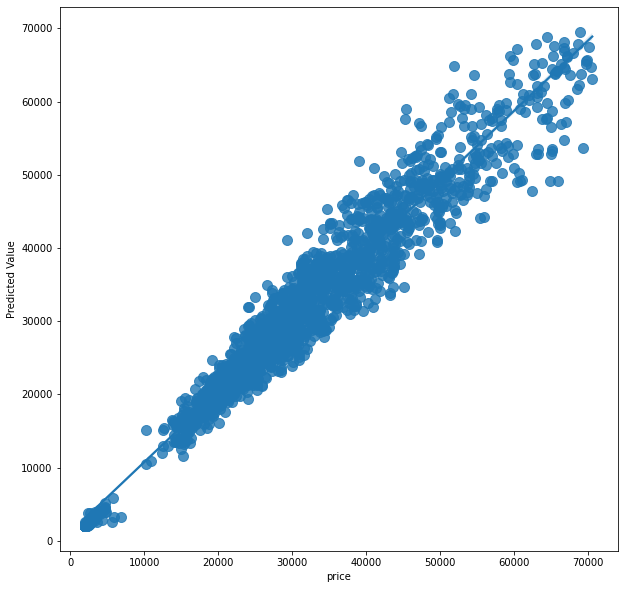

In [ ]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, rfr_pred, fit_reg=True, scatter_kws={"s": 100})

**Conclusion**
* The model performed really well with the r2 score of 0.95. 
* The mean square error is also 3331.

**Thanks for reviewing my notebook. Any remarks would be appreciated.**